In [3]:
from assignment.data_loader import DataLoader

df = DataLoader.load_to_df()

### number of users

In [4]:
len(df["id"].unique())

27

### reco

<Axes: xlabel='date'>

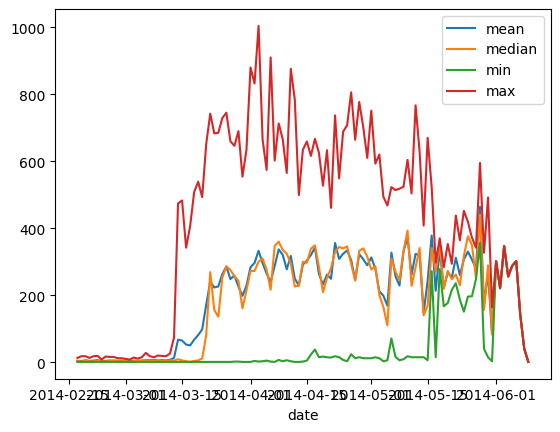

In [17]:
records_per_user_per_day = df.groupby(["id", "date"]).variable.count().to_frame().pivot_table(columns="id", index="date", values="variable")
records_per_user_per_day.agg(["mean", "median", "min", "max"], axis=1).plot()

In [12]:

for uid, sdf in list(df.groupby("id"))[:1]:
    dates_with_mood = sdf.groupby("date").apply(lambda x: len(x[x["variable"] == "mood"])).to_frame("n_mood_records")
    records_per_day = sdf.groupby("date").variable.count().to_frame("n_records")

records_per_day.join(dates_with_mood)

C:\Users\james\AppData\Local\Temp\ipykernel_22040\4155273757.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dates_with_mood = sdf.groupby("date").apply(lambda x: len(x[x["variable"] == "mood"])).to_frame("n_mood_records")


,n_records,n_mood_records
date,,
2014-02-17,2,0
2014-02-18,1,0
2014-02-19,9,0
2014-02-20,5,0
2014-02-21,1,0
...,...,...
2014-05-01,751,5
2014-05-02,481,5
2014-05-03,304,5


<Axes: xlabel='date'>

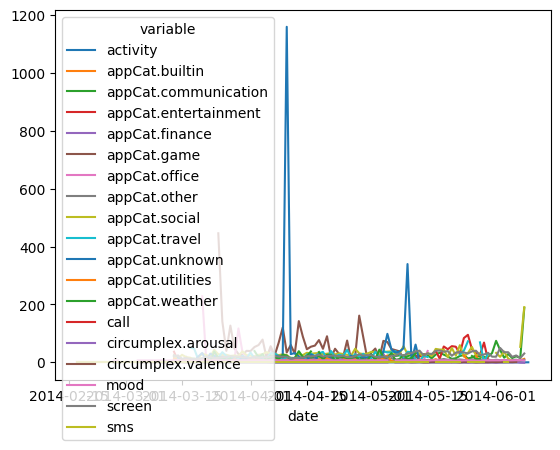

In [14]:
df["value"] = df["value"].astype(float)
df.groupby(["date", "variable"]).value.median().unstack().plot()